In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from tqdm import tqdm

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # 5-fold cross-validation 점수 계산
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mean_cv_score = np.mean(scores)
    
    # 모델을 트레이닝 데이터로 학습
    model.fit(X_train, y_train)
    
    # 테스트 데이터에 대한 예측 및 R-squared 점수 계산
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    return mean_cv_score, r2

In [2]:
# California housing 데이터셋 불러오기
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

In [7]:
# 데이터를 트레이닝 세트와 테스트 세트로 분리 (7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
dt = DecisionTreeRegressor(random_state=0)
dt_ = dt.fit(X_train, y_train)


In [29]:
print("DT test score :", dt_.score(X_test, y_test))

DT test score : 0.59849555924728


In [23]:
# Decision Tree 모델을 위한 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': list(range(1,11))
    # 'min_samples_leaf': [1, 5, 10]
}

In [24]:
from sklearn.model_selection import GridSearchCV

# 그리드 서치 설정
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='r2')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='r2')

In [25]:
print(grid_search.best_estimator_)

DecisionTreeRegressor(max_depth=9, random_state=0)


In [28]:
from sklearn.metrics import r2_score

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 테스트 데이터에 대한 R-squared 점수 계산
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.6746133192316127


In [20]:
print(dt_.score(X_train, y_train))
print(dt_.score(X_test, y_test))

1.0
0.59849555924728


## RF

In [32]:
rf = RandomForestRegressor(random_state=0)
rf_ = rf.fit(X_train, y_train)
print(rf_.score(X_test, y_test))

0.7943291147736206


In [40]:
rf_param_grid = { 'n_estimators' : list(range(100,1100,100))}

In [41]:
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='r2')

rf_grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# 최적의 모델 얻기
rf_best_model = rf_grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
rf_y_pred = rf_best_model.predict(X_test)

# 테스트 데이터에 대한 R-squared 점수 계산
r2 = r2_score(y_test, rf_y_pred)
print("R-squared score:", r2)

## GBDT

In [42]:
gbdt = GradientBoostingRegressor(random_state=0)
gbdt_ = gbdt.fit(X_train, y_train)
print(gbdt_.score(X_test, y_test))


0.7826346388949185


In [44]:
gbdt_param_grid = {'learning_rate': [0.01 * i for i in range(1, 11)]}

In [45]:
gbdt_grid_search = GridSearchCV(gbdt, gbdt_param_grid, cv=5, scoring='r2')
gbdt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 0.1]},
             scoring='r2')

In [46]:
gbdt_best_model = gbdt_grid_search.best_estimator_

gbdt_y_pred = gbdt_best_model.predict(X_test)

r2 = r2_score(y_test, gbdt_y_pred)
print("R-squared score:", r2)

R-squared score: 0.7826346388949185


## SVM

In [13]:
svr = SVR()
svm = svr.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [14]:
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

-0.025910731306174162
-0.026614167347668305


In [ ]:
svm_grid_search = GridSearchCV(svr, cv=5, scoring='r2')
svm_grid_search.fit(X_train, y_train)

In [4]:
# 모델 초기화
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR(),
    "k-Nearest Neighbors": KNeighborsRegressor()
}

# 각 모델의 성능을 저장할 리스트 초기화
model_names = []
scores = []

In [5]:
# 각 모델에 대한 성능 평가
for model_name, model in tqdm(models.items()):  # tqdm으로 래핑하여 진행 상황 표시
    mean_cv_score, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    
    # 결과를 리스트에 저장
    model_names.append(model_name)
    scores.append((mean_cv_score, r2))

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [06:06<00:00, 73.33s/it]


C:\Users\Jasic\AppData\Local\Temp\ipykernel_35792\1718307462.py:17: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  plt.tight_layout()
C:\Users\Jasic\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


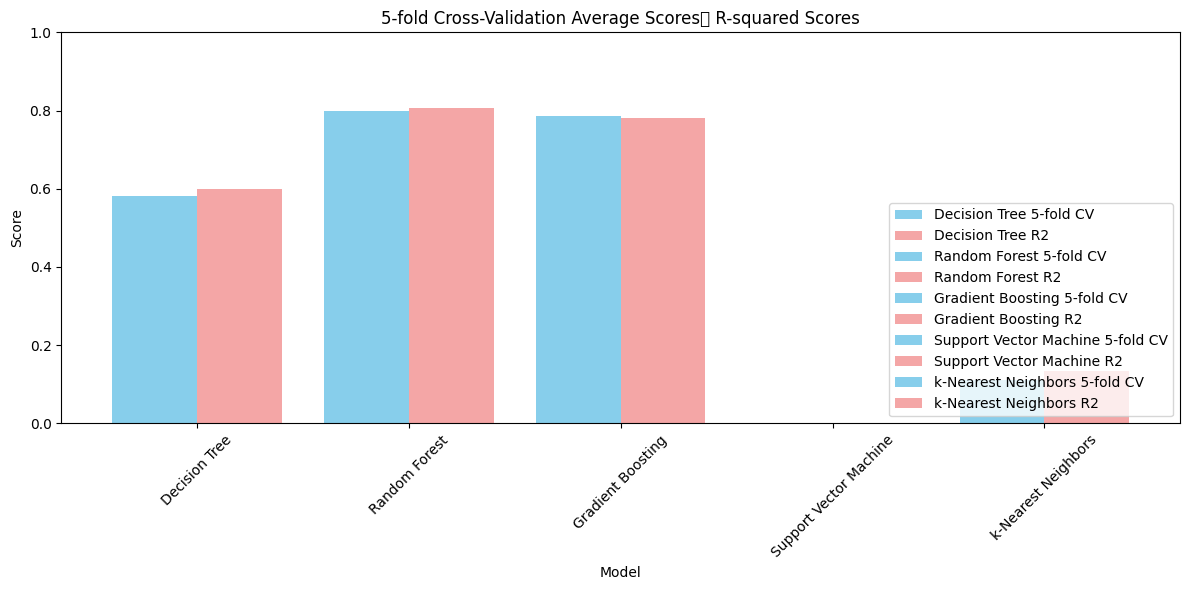

In [6]:
# 시각화: 각 모델의 5-fold Cross-Validation 평균 점수와 R-squared 점수를 한 그래프에 옆으로 그리기
bar_width = 0.4
index = np.arange(len(model_names))

plt.figure(figsize=(12, 6))

for i, (model_name, (cv_score, r2_score)) in enumerate(zip(model_names, scores)): 
    plt.bar(index[i], cv_score, bar_width, label=f'{model_name} 5-fold CV', color='skyblue')
    plt.bar(index[i] + bar_width, r2_score, bar_width, label=f'{model_name} R2', color='lightcoral', alpha=0.7)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('5-fold Cross-Validation Average Scores와 R-squared Scores')
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.legend(loc='lower right')
plt.ylim(0, 1)  # 점수 범위를 0에서 1로 설정 (R-squared의 범위)
plt.tight_layout()
plt.show()